## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [199]:
import pandas as pd
df = pd.read_csv('F:\\ITI\\Numerical Optimization\\RegData.csv',header=None)
print(df)

      0    1
0   2.9  4.0
1   6.7  7.4
2   4.9  5.0
3   7.9  7.2
4   9.8  7.9
5   6.9  6.1
6   6.1  6.0
7   6.2  5.8
8   6.0  5.2
9   5.1  4.2
10  4.7  4.0
11  4.4  4.4
12  5.8  5.2


#### Explore your data

In [200]:
x= np.array(df[0])
y= np.array(df[1])

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [18]:
print(x)
print(y)

[2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Explore your data

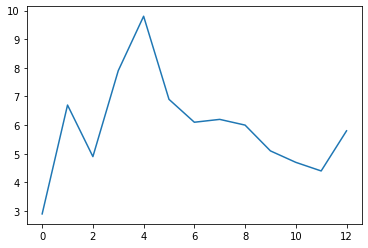

In [22]:
plt.plot(x)
plt.show()

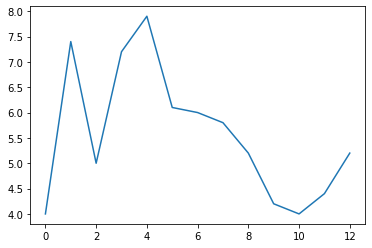

In [23]:
plt.plot(y)
plt.show()

#### Plot the original data (scatter plot of X,y)

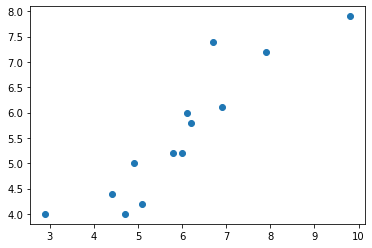

In [20]:
plt.scatter(x,y)
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

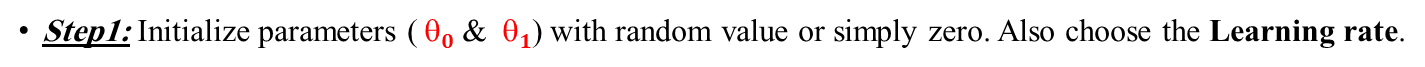

In [78]:
theta_0 , theta_1 = np.array([0]) , np.array([0])

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.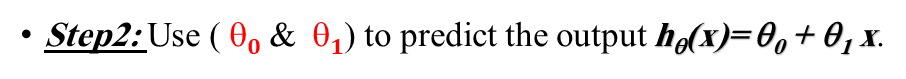
#### Note: you will need to iterate through all data points

In [79]:
H= theta_0+ theta_1*x
print(H)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).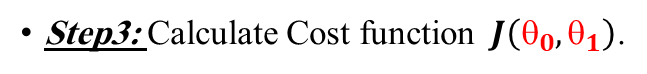
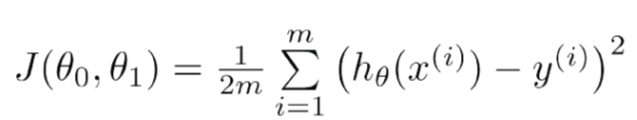

In [80]:
J = 0.5*np.square(np.subtract(H,y)).mean()
print(J)

16.305384479692318


### Step4: Calculate the gradient.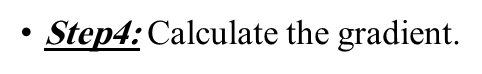
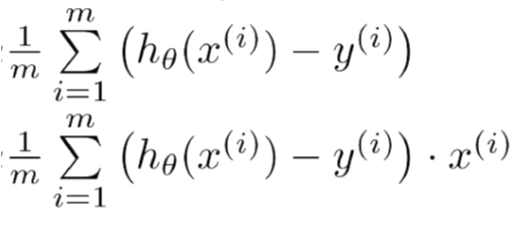

In [69]:
j_theta_0=  (np.subtract(H,y)).mean()
j_theta_1=  (x*(np.subtract(H,y))).mean()
print(j_theta_0,j_theta_1)

-5.569230739769231 -35.043846043215375


### Step5: Update the parameters (simultaneously).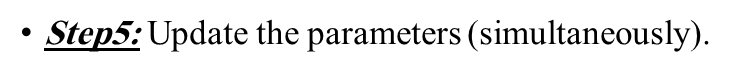
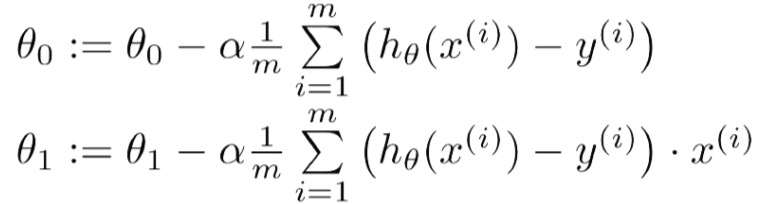

In [38]:
alpha= 0.01
theta_0,theta_1 = theta_0 - (alpha*j_theta_0), theta_1 - (alpha*j_theta_1)
print(theta_0,theta_1)

[0.16707692] [1.05131538]


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.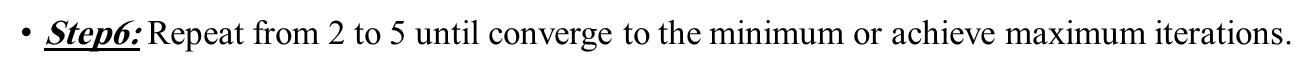

In [70]:
j= np.sqrt(np.square(j_theta_0)+ np.square(j_theta_1))
while j > 0.001 :
    theta_0,theta_1 = theta_0 - (alpha*j_theta_0), theta_1 - (alpha*j_theta_1)
    H= theta_0+ theta_1*x
    j_theta_0=  (np.subtract(H,y)).mean()
    j_theta_1=  (x*(np.subtract(H,y))).mean()
    j= np.sqrt(np.square(j_theta_0)+ np.square(j_theta_1))
print(j)    
print(theta_0,theta_1)

0.000999755401264131
[1.41988675] [0.69675234]


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [71]:
y_pred= theta_0+ theta_1*x
print(y_pred)

[3.44046859 6.08812727 4.83397327 6.92423028 8.24805979 6.22747794
 5.67007594 5.73975111 5.60040077 4.9733236  4.6946226  4.4855971
 5.46105044]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

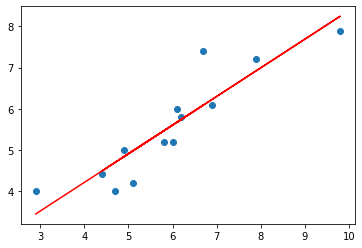

In [50]:
plt.scatter(x,y)
plt.plot(x,y_pred,color="red")
plt.show()

#### Use R2 score to evaluate LR equation output
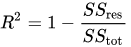
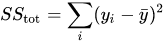
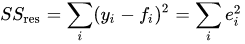
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [72]:
y_mean= y.mean()
#print(y-y_mean)
SS_tot= np.sum(np.square(y-y_mean))
#print(SS_tot)
SS_res= np.sum(np.square(y-y_pred))
#print(SS_res)

R2= 1- (SS_res/SS_tot)
print("R2 Score = ",R2)

R2 Score =  0.8213066507162166


## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

In [201]:
theta_0,theta_1 = np.array([0]),np.array([0])
H= theta_0+ theta_1*x
J = 0.5*np.square(np.subtract(H,y)).mean()
j_theta_0=  (np.subtract(H,y)).mean()
j_theta_1=  (x*(np.subtract(H,y))).mean()
alpha= 0.01
theta_0,theta_1 = theta_0 - (alpha*j_theta_0), theta_1 - (alpha*j_theta_1)
j= np.sqrt(np.square(j_theta_0)+ np.square(j_theta_1))
js=[]
while j > 0.001 :
    #np.append(js,j)
    theta_0,theta_1 = theta_0 - (alpha*j_theta_0), theta_1 - (alpha*j_theta_1)
    H= theta_0+ theta_1*x
    j_theta_0=  (np.subtract(H,y)).mean()
    j_theta_1=  (x*(np.subtract(H,y))).mean()
    j= np.array(np.sqrt(np.square(j_theta_0)+ np.square(j_theta_1)))
    js.append(j)
#print(js)    
print(theta_0,theta_1)

[1.41988675] [0.69675234]


### Plot loss vs. iterations

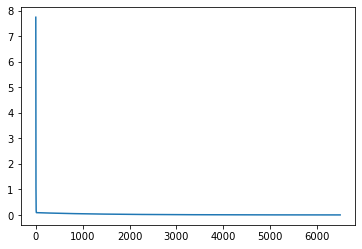

In [202]:
plt.plot(js)
plt.show()

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [425]:

df_m = pd.read_csv('F:\\ITI\\Numerical Optimization\\MultipleLR.csv',header=None)
print(df_m)


     0   1    2    3
0   73  80   75  152
1   93  88   93  185
2   89  91   90  180
3   96  98  100  196
4   73  66   70  142
5   53  46   55  101
6   69  74   77  149
7   47  56   60  115
8   87  79   90  175
9   79  70   88  164
10  69  70   73  141
11  70  65   74  141
12  93  95   91  184
13  79  80   73  152
14  70  73   78  148
15  93  89   96  192
16  78  75   68  147
17  81  90   93  183
18  88  92   86  177
19  78  83   77  159
20  82  86   90  177
21  86  82   89  175
22  78  83   85  175
23  76  83   71  149
24  96  93   95  192


In [301]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm


In [426]:
x_1= np.array(df_m[0]) 
#x_1= normalize(x_1)
x_2= np.array(df_m[1]) 
#x_2= normalize(x_2)
x_3= np.array(df_m[2])
#x_3= normalize(x_3)
y= np.array(df_m[3])
#y=normalize(y)
print(x_1)
print(y)

[73 93 89 96 73 53 69 47 87 79 69 70 93 79 70 93 78 81 88 78 82 86 78 76
 96]
[152 185 180 196 142 101 149 115 175 164 141 141 184 152 148 192 147 183
 177 159 177 175 175 149 192]


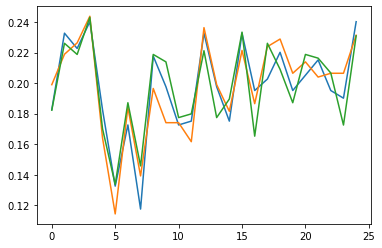

In [333]:
plt.plot(x_1)
plt.plot(x_2)
plt.plot(x_3)
plt.show()

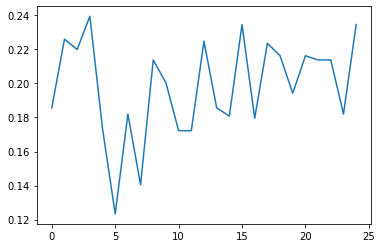

In [334]:
plt.plot(y)
plt.show()

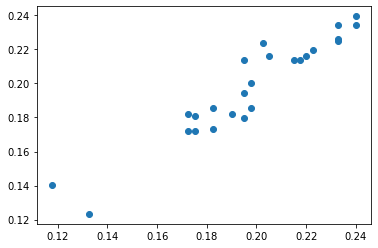

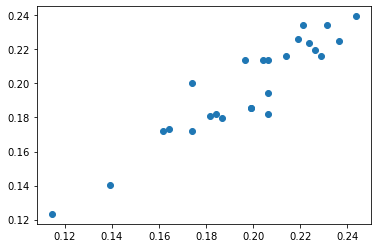

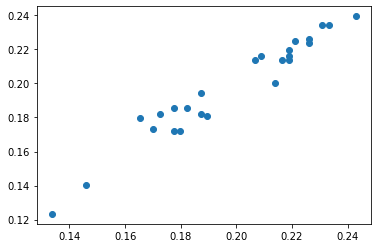

In [335]:
plt.scatter(x_1,y)
plt.show()
plt.scatter(x_2,y)
plt.show()
plt.scatter(x_3,y)
plt.show()

### Repeat your implementation but for more than one variable

In [429]:
theta_0,theta_1,theta_2,theta_3 = np.array([0]),np.array([0]),np.array([0]),np.array([0])

js=[1,1]
j=12
while abs(j-js[-2]) > 0.000001:

    alpha= 0.0001
    H= theta_0+ theta_1*x_1 + theta_2*x_2+ theta_3*x_3
    #print(H-y)
    j_theta_0=  (np.subtract(H,y)).mean()
    j_theta_1= (x_1*(np.subtract(H,y))).mean()
    j_theta_2= (x_2*(np.subtract(H,y))).mean()
    j_theta_3= (x_3*(np.subtract(H,y))).mean()
    theta_0,theta_1,theta_2,theta_3 = (theta_0 - (alpha*j_theta_0)), (theta_1 - (alpha*j_theta_1)) , (theta_2 - (alpha*j_theta_2)) ,(theta_3 - (alpha*j_theta_3))
    j = 0.5*np.square(np.subtract(H,y)).mean()
    
    #print(j)
    js.append(j) 

print(" Theta_0 = ",theta_0)
print(" Theta_1 = ",theta_1)
print(" Theta_2 = ",theta_2)
print(" Theta_3 = ",theta_3)

 Theta_0 =  [-0.01743989]
 Theta_1 =  [0.35960548]
 Theta_2 =  [0.52859977]
 Theta_3 =  [1.12547995]


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [430]:
H_pred=theta_0 + theta_1 * x_1 + theta_2 * x_2 + theta_3 * x_3 
print(H_pred-y)


[ 0.93273784 -0.38771533  1.38322221  2.85545844 -2.09505867  4.2586371
  1.57367719 -0.98559835 -0.67918599  0.43561234  2.95735833  1.7994449
  2.06152316  0.83941084  3.53016285 -3.48267572 -2.79059323 -1.64578156
  0.05029672 -0.43247555 -0.777015   -0.57847211 -7.42863597  2.09543381
 -1.41494015]


### Plot loss vs. iterations

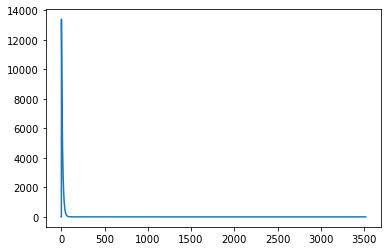

In [431]:
plt.plot(js)
plt.show()

#### Use R2 score to evaluate LR equation output

In [432]:
y_mean= y.mean()
#print(y-y_mean)
SS_tot= np.sum(np.square(y-y_mean))
#print(SS_tot)
SS_res= np.sum(np.square(y-H_pred))
#print(SS_res)

R2= 1- (SS_res/SS_tot)
print("R2 Score = ",R2)

R2 Score =  0.989013123624015


# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [456]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
df = pd.read_csv("F:\\ITI\\Numerical Optimization\\RegData.csv", header=None)
df_model= df.to_numpy()


x= df_model[:,:-1]
y= df_model[:,-1:]


#### Train the model (fit the model to the training data)

In [457]:
model = LinearRegression().fit(x, y)
print(model.coef_)

[[0.69452919]]


#### Predict y values using the trained model

In [459]:
y_pred = model.predict(x)
print(y_pred)

[[3.44824549]
 [6.08745623]
 [4.83730388]
 [6.92089146]
 [8.240497  ]
 [6.22636227]
 [5.67073878]
 [5.74019163]
 [5.60128593]
 [4.97620959]
 [4.69839784]
 [4.49003928]
 [5.46238022]]


#### Plot model output (fitted line) with the original data (scatter plot of X,y)

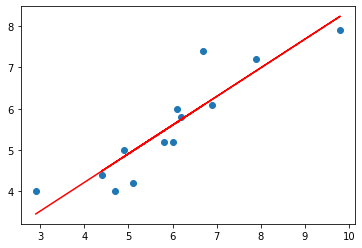

In [460]:
plt.scatter(x,y)
plt.plot(x,y_pred,color="red")
plt.show()

#### Use R2 score to evaluate model output

In [461]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.8213156778363775

### Repeat for Mulivariate

In [462]:
df = pd.read_csv("F:\\ITI\\Numerical Optimization\\MultipleLR.csv", header=None)
df_model= df.to_numpy()

x= df_model[:,:-1]
y= df_model[:,-1:]

model = LinearRegression().fit(x, y)
print(model.coef_)
model.score(x, y)

[[0.35593822 0.54251876 1.16744422]]


0.98966157894484